# Understanding Descriptive Statistics

Import the necessary libraries here:

In [86]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [7]:
ice_array = np.random.randint(1, 6, 10)
pd.DataFrame(ice_array, columns = ['Value'])

,Value
0,3
1,2
2,2
3,1
4,2
5,5
6,5
7,4
8,3
9,1


In [6]:
# your code here
def dice_rolling(trials):
    
    dice_array = np.random.randint(1, 6, trials)
    
    return pd.DataFrame(dice_array, columns = ['Value'])

#### 2.- Plot the results sorted by value.

In [21]:
# your code here

dice_simulation = dice_rolling(10)

dice_simulation.reset_index(inplace = True)

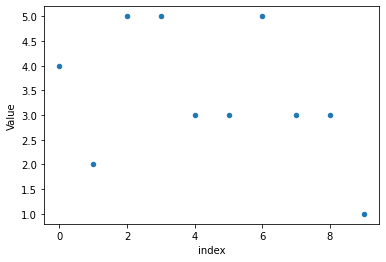

In [25]:
dice_simulation.plot(x = 'index', y = 'Value', kind = 'scatter')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

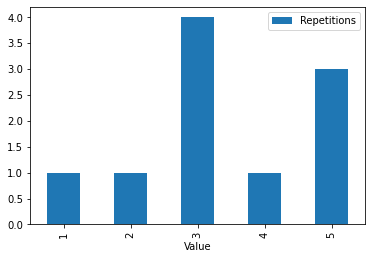

In [52]:
# your code here
dice_frecuency_simulation = dice_simulation.groupby('Value').agg({'Value': 'count'})
dice_frecuency_simulation['Repetitions'] = dice_frecuency_simulation['Value']
dice_frecuency_simulation.drop(columns = 'Value', inplace = True)
dice_frecuency_simulation.reset_index(inplace = True)
dice_frecuency_simulation.plot(x = 'Value', y = 'Repetitions', kind = 'bar')

In [ ]:
"""
The frecuency distribution represents how many times a value is repeated
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [58]:
# your code here

def mean_function(lista):
    
    suma = 0
    count = 0

    for i in lista:
        suma += i
        count += 1
        
    return suma/count

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [56]:
dice_frecuency_simulation

,Value,Repetitions
0,1,1
1,2,1
2,3,4
3,4,1
4,5,3


In [59]:
# your code here
suma = 0
count = 0

for i, j in zip(dice_frecuency_simulation['Repetitions'].tolist(), dice_frecuency_simulation['Value'].tolist()):
    
    suma += i * j
    count += i
    
media = suma / count

media

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [144]:
# your code here

def mediam_function(lista):
    
    order_list = lista.sort()
    
    lenght_lista = len(lista)
    
    position = round(lenght_lista * 0.5)
    
    return lista[position]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [142]:
# your code here

def quartile(lista, quartile):
    
    order_list = lista.sort()
    
    lenght_lista = len(lista)
    
    position = round(lenght_lista * quartile)
    
    return lista[position]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

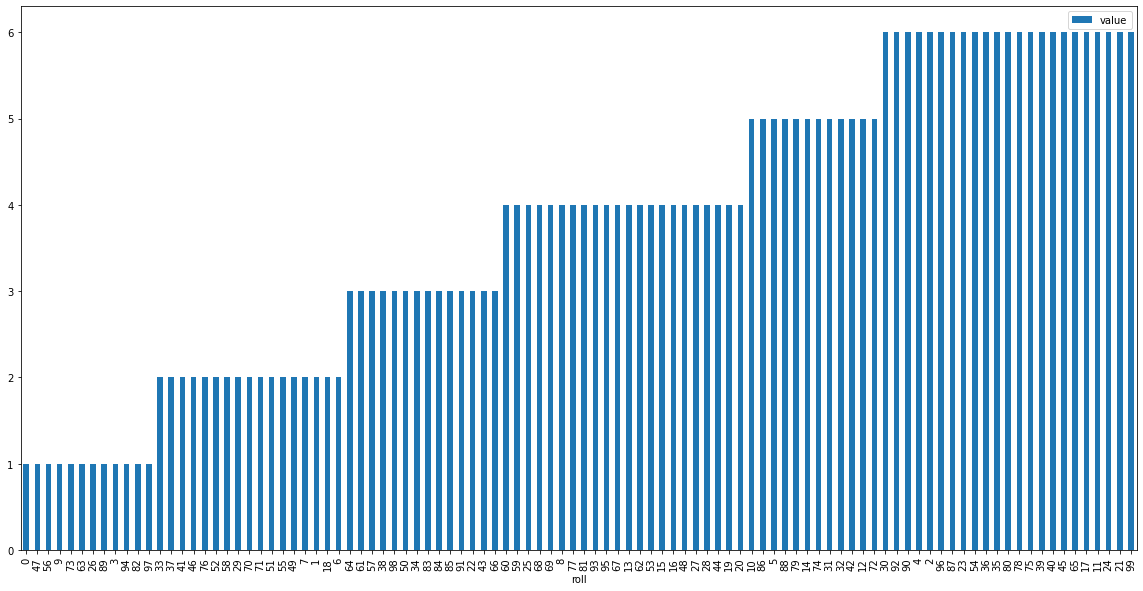

In [68]:
# your code here
roll_dice = pd.read_csv('./../data/roll_the_dice_hundred.csv')

roll_dice.sort_values(by = 'value', inplace = True)

roll_dice.plot(x = 'roll', y = 'value', kind = 'bar', figsize = (20,10))

In [69]:
"""
We obsersed that each value appear approximately the same number of times
"""

'\nWe obsersed that each value appear approximately the same number of times\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [70]:
# your code here
mean_function(roll_dice['value'].tolist())

3.74

#### 3.- Now, calculate the frequency distribution.


In [92]:
# your code here

roll_dice_frecuency = roll_dice.groupby('value').agg({'value': 'count'})
roll_dice_frecuency['Repetitions'] = roll_dice_frecuency['value']
roll_dice_frecuency.drop(columns = 'value', inplace = True)
roll_dice_frecuency.reset_index(inplace = True)
roll_dice_frecuency

,value,Repetitions
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

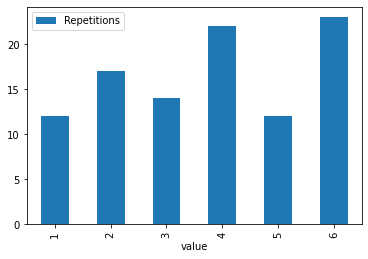

In [93]:
# your code here
roll_dice_frecuency.plot(x = 'value', y = 'Repetitions', kind = 'bar')

In [ ]:
"""
The most repeteated value is 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

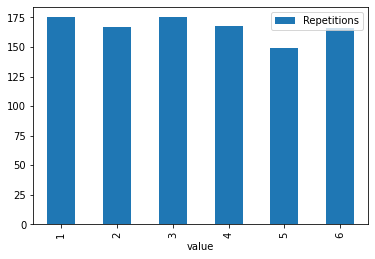

In [94]:
# your code here
roll_thounsand = pd.read_csv('./../data/roll_the_dice_thousand.csv')
roll_dice_frecuency = roll_thounsand.groupby('value').agg({'value': 'count'})
roll_dice_frecuency['Repetitions'] = roll_dice_frecuency['value']
roll_dice_frecuency.drop(columns = 'value', inplace = True)
roll_dice_frecuency.reset_index(inplace = True)
roll_dice_frecuency.plot(x = 'value', y = 'Repetitions', kind = 'bar')

In [ ]:
"""
The values have a more homogeneous shape
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

The mean is around 40 and std is around 10


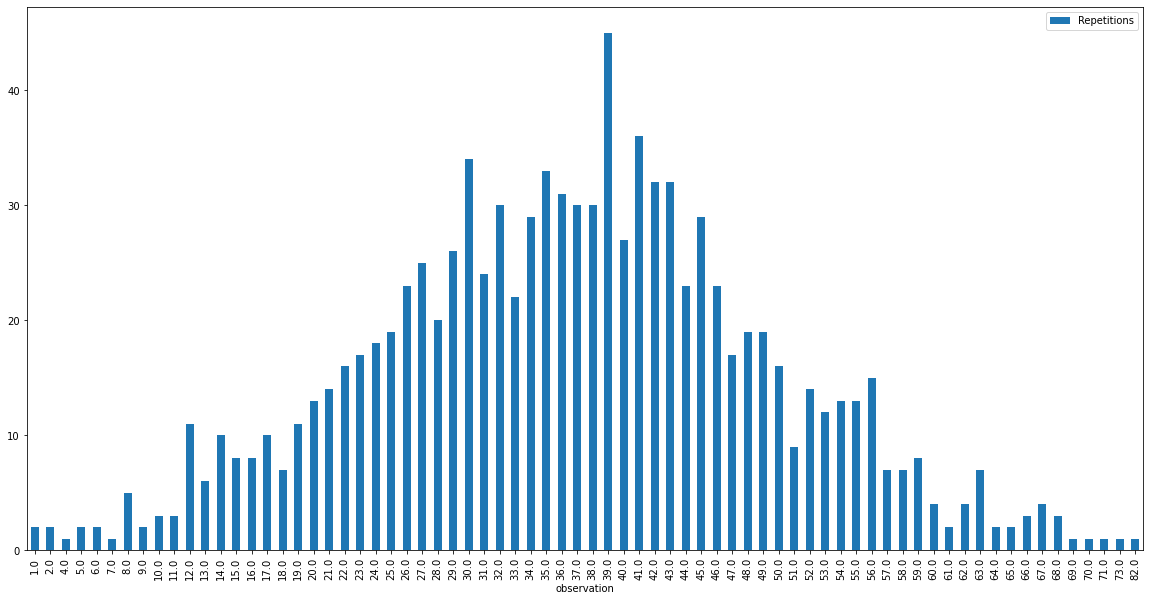

In [107]:
# your code here
age_1 = pd.read_csv('./../data/ages_population.csv')

aggregation = age_1.groupby('observation').agg({'observation': 'count'})
aggregation['Repetitions'] = aggregation['observation']
aggregation.drop(columns = 'observation', inplace = True)
aggregation.reset_index(inplace = True)
aggregation.plot(x = 'observation', y = 'Repetitions', kind = 'bar', figsize = (20,10))

print('The mean is around 40 and std is around 10')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [109]:
# your code here
media = age_1['observation'].mean()
std = age_1['observation'].std()

print(f'The mean value is {media} and the standard deviation is {std}')

The mean value is 36.56 and the standard deviation is 12.81649962597677


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

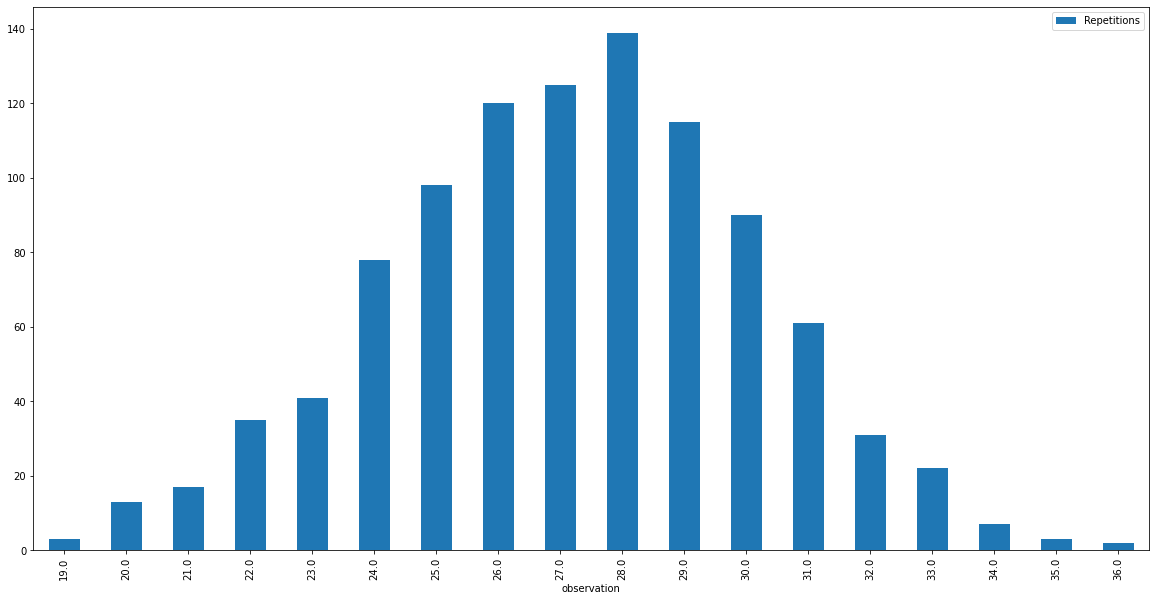

In [110]:
# your code here
age_2 = pd.read_csv('./../data/ages_population2.csv')

aggregation = age_2.groupby('observation').agg({'observation': 'count'})
aggregation['Repetitions'] = aggregation['observation']
aggregation.drop(columns = 'observation', inplace = True)
aggregation.reset_index(inplace = True)
aggregation.plot(x = 'observation', y = 'Repetitions', kind = 'bar', figsize = (20,10))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [111]:
"""
The sample is much more smaller, therefore the std is gonna be smaller
"""

'\nThe sample is much more smaller, therefore the std is gonna be smaller\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [113]:
# your code here
media = age_2['observation'].mean()
std = age_2['observation'].std()

print(f'The mean value is {media} and the standard deviation is {std}')

The mean value is 27.155 and the standard deviation is 2.9698139326891835


In [ ]:
"""
Both the mean age and the std are smaller
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

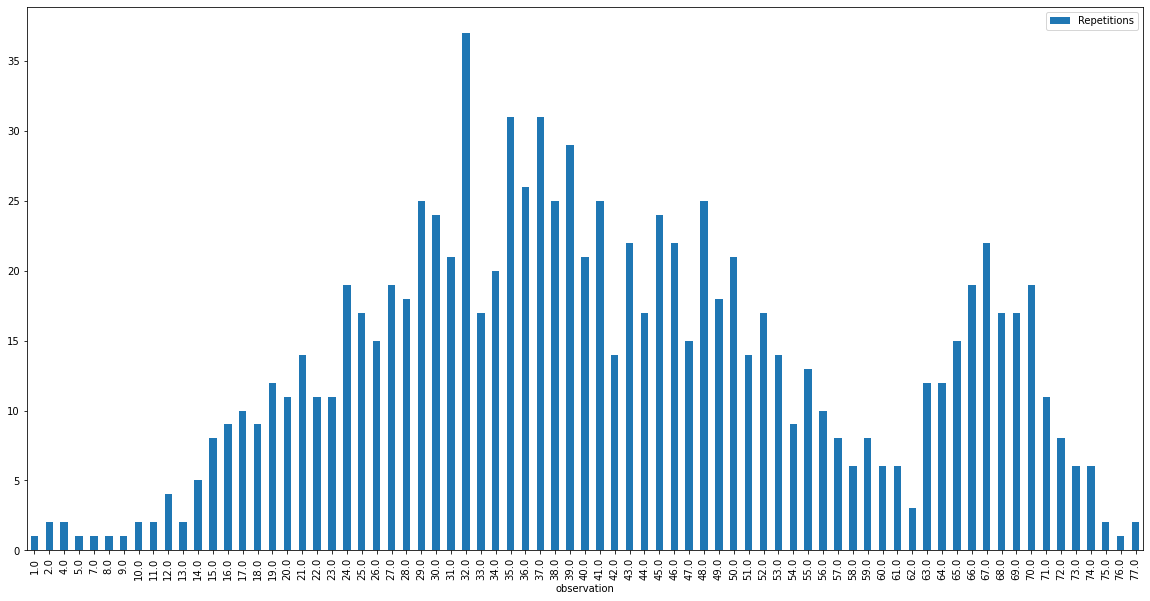

In [115]:
# your code here
age_3 = pd.read_csv('./../data/ages_population3.csv')

aggregation = age_3.groupby('observation').agg({'observation': 'count'})
aggregation['Repetitions'] = aggregation['observation']
aggregation.drop(columns = 'observation', inplace = True)
aggregation.reset_index(inplace = True)
aggregation.plot(x = 'observation', y = 'Repetitions', kind = 'bar', figsize = (20,10))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [116]:
# your code here
media = age_3['observation'].mean()
std = age_3['observation'].std()

print(f'The mean value is {media} and the standard deviation is {std}')

The mean value is 41.989 and the standard deviation is 16.14470595986593


In [ ]:
"""
The values are more widely distributed so the std is larger
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [139]:
# your code here
q1 = quartile(age_3['observation'].tolist(), 0.25)
q2 = quartile(age_3['observation'].tolist(), 0.5)
q3 = quartile(age_3['observation'].tolist(), 0.75)

In [ ]:
"""
q2 and q3 values are close that explains the larger std
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [141]:
# your code here
quartile(age_3['observation'].tolist(), 0.9)

67.0

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""